# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from numpy.random import seed
medical = pd.read_csv(r"C:\Users\Samuel Oluwatoba\Downloads\1585247986_Frequentist_Case_Study\Frequentist Case Study\insurance2.csv")

In [12]:
medical.shape

(1338, 8)

In [13]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__

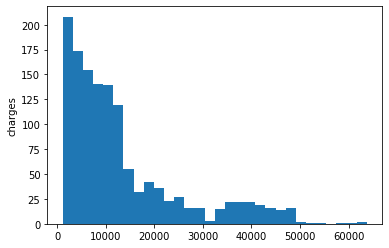

In [24]:
plt.hist(medical.charges, bins= 30)
plt.xlabel('')
plt.ylabel('charges')
plt.show()

In [28]:
sample_mean = np.mean(medical.charges)
sample_std = np.std(medical.charges)
print("mean:", sample_mean, ' ',  'std:', sample_std)

mean: 13270.422265141257   std: 12105.484975561605


__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__ The data is right skewed and is clearly not normally distributed. However, we can correctly justify our usage of t-statistic and z-statistic because the data sufficiently meets the asusmptions for CLT (Central Limit Theorem)

1. The question already states that the data represents a random sample of charges. This satisfies the 'Randomization Condition'.
2. Individual medical charges are independent of each other since they were randomly sampled. Also in the practical world, individual medical charges are independent events.
3. Sample size is over 1300. The sample is not normally distributed but the big sample size makes up for the non-normality. Thus 'Sample Size Assumption' is met.

From the CLT a good rule of thumb: sample distributions will usually be approximately normal if their sample size is n = 30 or larger.

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__ One sided interval would be appropraite given the administrator's concern. 

The Null Hypothesis $H_0$ would be : There sample mean is 12000.

The Alternative $H_1$ would be: sample mean is greater than 1200.

* Moreover we would be calculating the left tail critical value since we want to know if the average charge has fallen below $12000

In [25]:
# calculating for Critical value
# We're testing a value (12000) below the mean, thus p would be 0.05
p = 0.05
sample_size = medical.shape[0]
df = sample_size - 1  # degrees of freedom 

t_critical = t.ppf(p, df)
print("The critical t value for 95% confidence interval is: {} ".format(t_critical))

The critical t value for 95% confidence interval is: -1.6459941145571324 


In [29]:
# Margin of Error:
# moe = critical_value * standard_error

standard_error = sample_std / (np.sqrt(sample_size))
margin = t_critical *  standard_error
print("The margin of error is: {} ".format(margin))

The margin of error is: -544.7314053390936 


In [43]:
interval_lower_bound = sample_mean + margin 
interval_lower_bound
print('Thus we can be confident 95% of the time that the true population mean lies above the value of 12725.69')
print('In conclusion, we reject the null hypothesis')

Thus we can be confident 95% of the time that the true population mean lies above the value of 12725.69
In conclusion, we reject the null hypothesis


The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__ Our assumption is that the two groups have the same variance.

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

In [44]:
#Manual Appraoch

# Let's define insured and uninsured. From the data, Insuranceclaim: yes=1, no=0.
insured = medical.charges[medical.insuranceclaim == 1]  
uninsured = medical.charges[medical.insuranceclaim == 0]

In [46]:
#Now, find mean and std of insured and uninsured
mean_insured = np.mean(insured)
std_insured= np.std(insured)

mean_uninsured = np.mean(uninsured)
std_uninsured= np.std(uninsured)

In [48]:
#highlights parameters for pooled std and t-statistic to  solve manually

n0 = len(insured)
n1 = len(uninsured)
s0 = np.std(insured)
s1 = np.std(uninsured)
x_bar0 = mean_insured
x_bar1 = mean_uninsured

In [69]:
sp = np.sqrt( ((n0-1)*(s0)**2 + (n1-1)*(s1)**2)/ (n0+n1-2) )
t = (x_bar1 - x_bar0)/(sp * np.sqrt(1/n0 + 1/n1)) 

In [70]:
print("The pooled standard deviation is: {} ".format(sp))
print("The t critical value is: {} ".format(t))


The pooled standard deviation is: 11512.282899205744 
The t critical value is: -11.901306943555385 


In [71]:
#Now lets do the same using scipy.stats library
from scipy.stats import ttest_ind
#print(ttest_ind.__doc__)
t_stats, p_value = ttest_ind(uninsured, insured, equal_var = True)
print(t_stats)


-11.893299030876712


In [72]:
# Using scipy's ttest_ind method we got approximately the same as when we solved manually

Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

In [74]:
import scipy.stats
print(scipy.stats.__doc__)


.. _statsrefmanual:

Statistical functions (:mod:`scipy.stats`)

.. currentmodule:: scipy.stats

This module contains a large number of probability distributions as
well as a growing library of statistical functions.

Each univariate distribution is an instance of a subclass of `rv_continuous`
(`rv_discrete` for discrete distributions):

.. autosummary::
   :toctree: generated/

   rv_continuous
   rv_discrete
   rv_histogram

Continuous distributions

.. autosummary::
   :toctree: generated/

   alpha             -- Alpha
   anglit            -- Anglit
   arcsine           -- Arcsine
   argus             -- Argus
   beta              -- Beta
   betaprime         -- Beta Prime
   bradford          -- Bradford
   burr              -- Burr (Type III)
   burr12            -- Burr (Type XII)
   cauchy            -- Cauchy
   chi               -- Chi
   chi2              -- Chi-squared
   cosine            -- Cosine
   crystalball       -- Crystalball
   dgamma            -- Double Gamma
 

__A:__  Yeah, to perform a ztest, we use: scipy.stats.zscore as in the doc above

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test